In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
sns.set_style("whitegrid")

In [27]:
%matplotlib inline

In [28]:
summary = pd.read_csv("atussum_2013.dat")
summary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11385 entries, 0 to 11384
Columns: 413 entries, tucaseid to t500107
dtypes: float64(1), int64(412)
memory usage: 36.0 MB


In [29]:
def activity_by_age(df, activity_code, subsample=True):
    activity_col = "t{}".format(activity_code)
    df = df[['TUFINLWGT', 'TEAGE', activity_col]]
    df = df.rename(columns={"TUFINLWGT": "weight", "TEAGE": "age", activity_col: "minutes"})
    if subsample:
        df = df[df.age % 5 == 0]
    df['weighted_minutes'] = df.weight * df.minutes
    df = df.groupby("age").sum()
    df['mean_minutes'] = df.weighted_minutes / df.weight
    df = df[['mean_minutes']]
    return df

In [30]:
medical_care = activity_by_age(summary, "080401", subsample=False)
medical_care

,mean_minutes
age,
15,0.790177
16,2.828509
17,2.023755
18,1.951486
19,0.175570
20,0.899249
21,0.602003
22,0.445543
23,1.582462


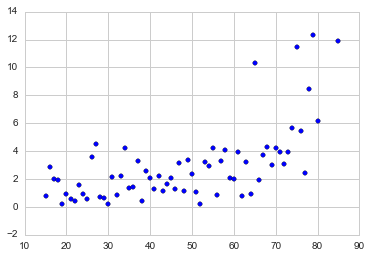

In [31]:
medical_care = activity_by_age(summary, "080401", subsample=False)
plt.scatter(medical_care.index, medical_care.mean_minutes)

In [13]:
def linear_least_squares(df, fn):
    values = df.index.map(fn)
    diffs = df.mean_minutes - values
    diffs_squared = diffs ** 2
    return diffs_squared.sum() / (2 * len(diffs)) 

48.3584490073


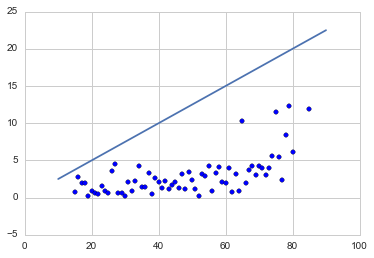

In [14]:
fn1 = lambda x: 0 + 0.25 * x
print(linear_least_squares(medical_care, fn1))
plt.scatter(medical_care.index, medical_care.mean_minutes)
xmin, xmax = plt.xlim()
xs = np.array([xmin, xmax])
plt.plot(xs, fn1(xs))

12.0451166721


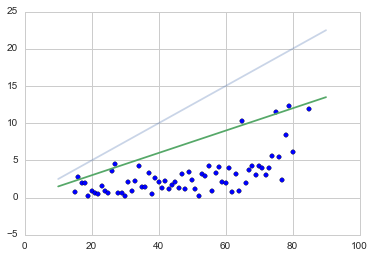

In [15]:
fn2 = lambda x: 0 + 0.15 * x
print(linear_least_squares(medical_care, fn2))
plt.scatter(medical_care.index, medical_care.mean_minutes)
xmin, xmax = plt.xlim()
xs = np.array([xmin, xmax])
plt.plot(xs, fn1(xs), alpha=0.3)
plt.plot(xs, fn2(xs))

3.96811468369


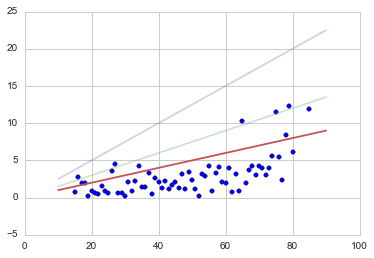

In [16]:
fn3 = lambda x: 0 + 0.1 * x
print(linear_least_squares(medical_care, fn3))
plt.scatter(medical_care.index, medical_care.mean_minutes)
xmin, xmax = plt.xlim()
xs = np.linspace(xmin, xmax, 100)
plt.plot(xs, fn1(xs), alpha=0.3)
plt.plot(xs, fn2(xs), alpha=0.3)
plt.plot(xs, fn3(xs))

In [20]:
regression = linear_model.LinearRegression()
regression.fit(np.array(medical_care.index.values).reshape((-1, 1)), 
               medical_care.mean_minutes.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
regression.predict(60)

array([ 3.97856719])

In [22]:
print(regression.coef_, regression.intercept_)

[ 0.08565362] -1.16065027669


In [23]:
regression.score(np.array(medical_care.index.values).reshape((-1, 1)), 
               medical_care.mean_minutes.values)

0.38481807332527174

2.21770122909


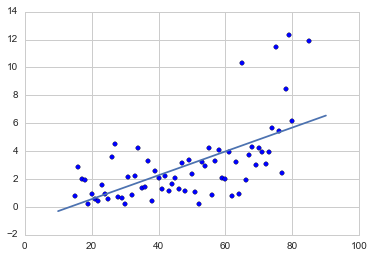

In [24]:
fn = lambda x: regression.predict(x)[0]
print(linear_least_squares(medical_care, fn))
plt.scatter(medical_care.index, medical_care.mean_minutes)
xmin, xmax = plt.xlim()
xs = np.linspace(xmin, xmax, 100)
plt.plot(xs, [fn(x) for x in xs])

In [25]:
linear_least_squares(medical_care, lambda x: regression.predict(x)[0])

2.2177012290946809